<a href="https://www.kaggle.com/code/hanigaouaou/heart-disease-prediction?scriptVersionId=296294408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv")
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


# 1. EDA:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

# 2. Handling missing values:

In [7]:
categories_to_check = ["Chest pain type","BP","Cholesterol", "Slope of ST","Max HR", 'Thallium']

(df[categories_to_check] == 0).sum()

Chest pain type    0
BP                 0
Cholesterol        0
Slope of ST        0
Max HR             0
Thallium           0
dtype: int64

# 3. Encoding Categorical Features

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Heart Disease"] = le.fit_transform(df["Heart Disease"])
df.head()


# OR ----
# mapping = {"Absence": 0,"Presence": 1}
# df["Heart Disease"] = df["Heart Disease"].map(mapping)
# df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# 3. Visualization:

<Figure size 1500x1000 with 0 Axes>

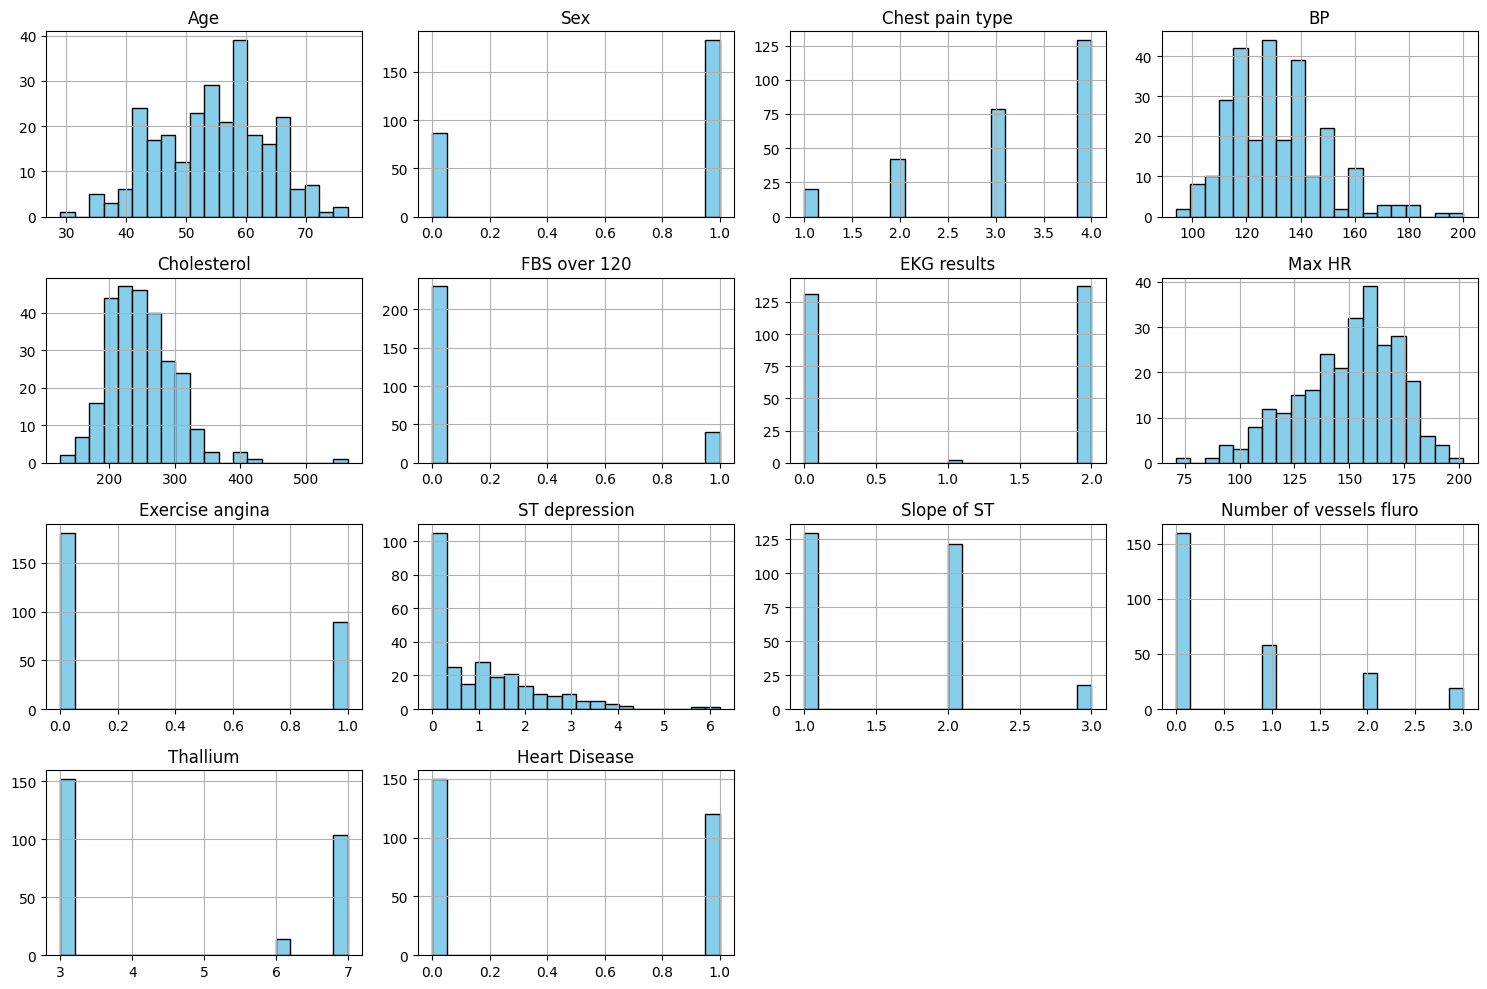

In [9]:
plt.figure(figsize=(15, 10))

df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

The distribution plots show that Age, Cholesterol, ST Depression, BP and MAX HR all follow a normal distribution with slight variable skewness in each, this calls for a need to apply scaling on these features.

## Correlation Heatmap:

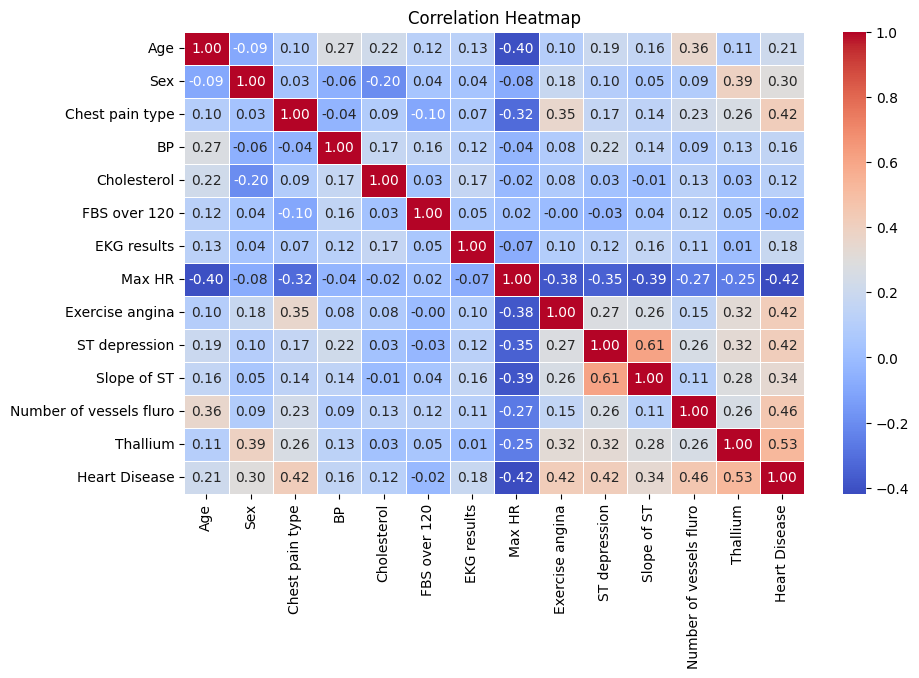

In [10]:
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', 
linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Boxplot:

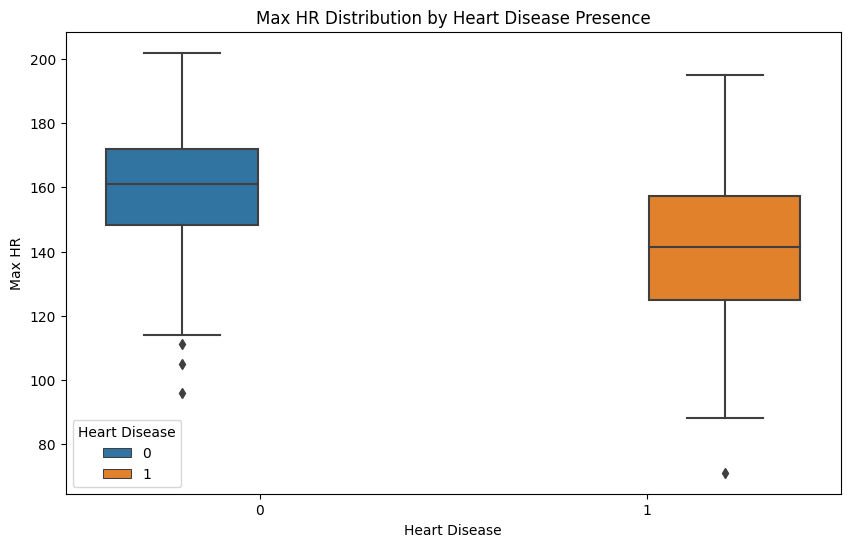

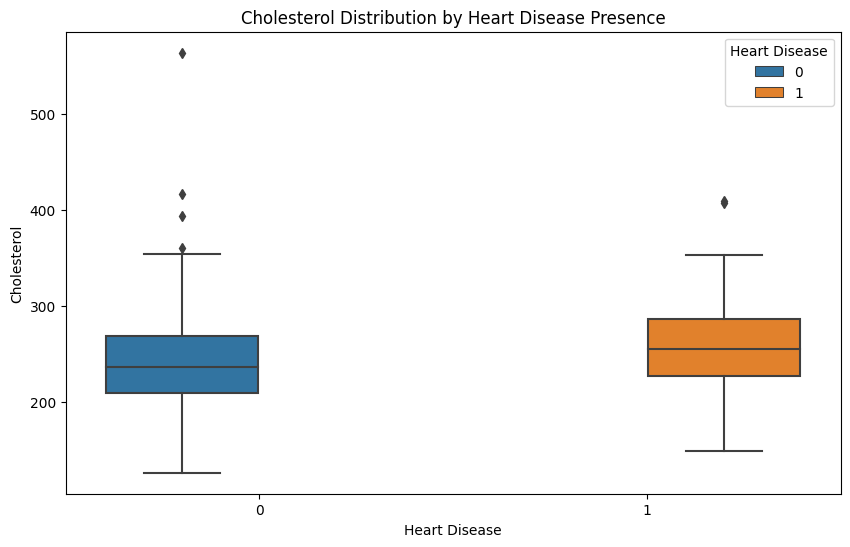

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Disease', y='Max HR', data=df, hue='Heart Disease')
plt.title('Max HR Distribution by Heart Disease Presence')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Disease', y='Cholesterol', data=df, hue='Heart Disease')
plt.title('Cholesterol Distribution by Heart Disease Presence')
plt.show()

From the boxplots we can notice that Heart Disease Presence affects negatively the Max HR someone can have. In addition, the cholesterol level is highly correlated with the presence of Heart Disease suggesting that it might be a factor in causing the latter.

## Count Plot for Target Variable (Heart Disease):

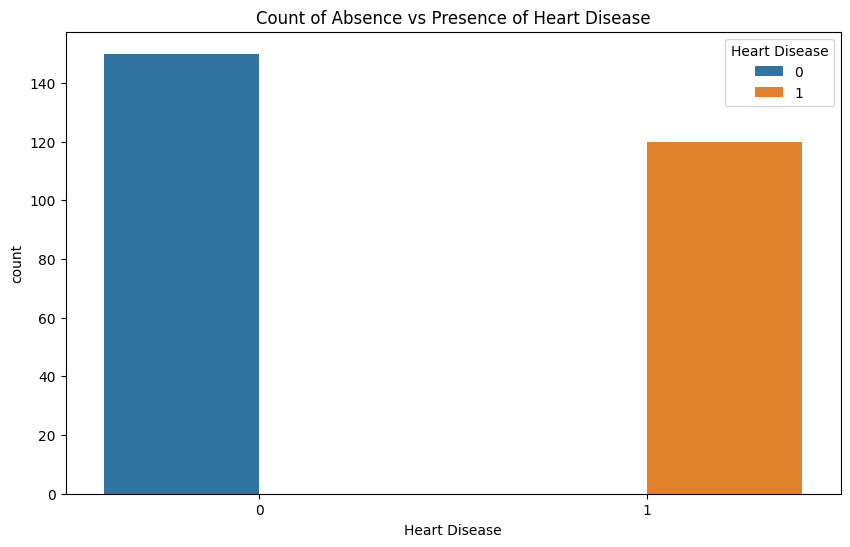

In [12]:
plt.figure(figsize =(10,6))

sns.countplot( x="Heart Disease", data=df, hue='Heart Disease')
plt.title('Count of Absence vs Presence of Heart Disease')
plt.show()

There is a slight imbalance between the two classes which calls for using a stratified splitting.

# 4. Train-Test Stratified Splitting:

In [13]:
from sklearn.model_selection import train_test_split

X= df.drop('Heart Disease', axis=1)
y= df["Heart Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

# 5. Scaling: 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Model Training:

## 6.1. Random Forest Classifier:

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

SEED = 3

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=SEED)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Accuracy: {score}")

RandomForestClassifier Accuracy: 0.8333333333333334


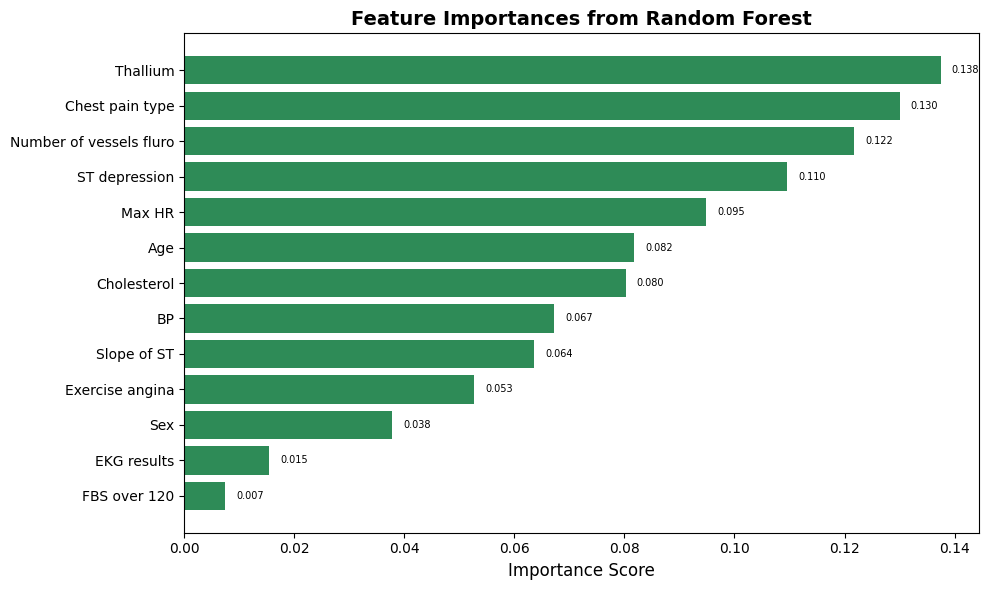

In [16]:
# Visualising feature importance
feat_importances = pd.Series(rf.feature_importances_,index=X.columns).sort_values()

# --- Visualization ---
plt.figure(figsize=(10,6))
bars = plt.barh(feat_importances.index, feat_importances.values, color="#2e8b57")

# Add values to bars
for bar in bars:
    plt.text(bar.get_width() + 0.002, 
             bar.get_y() + bar.get_height()/2, 
             f"{bar.get_width():.3f}", 
             va='center', fontsize=7)

plt.title("Feature Importances from Random Forest", fontsize=14, weight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.tight_layout()
plt.show()

## 6.2. KNeighbor Classifier:

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.72      0.88      0.79        24

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.81      0.80      0.80        54



## 6.3. Support Vector Machine:

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54

